In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import copy
from torchvision import models

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.transforms import transforms
from PIL import Image
from pathlib import Path


Populating the interactive namespace from numpy and matplotlib


C:\Users\amak7\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
torch.cuda.empty_cache()


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Dataset, transforms, and visualisation

In [4]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(256), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    #transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [5]:
trainset = torchvision.datasets.ImageFolder(root='./data/Training', transform=transform_train)

testset =  torchvision.datasets.ImageFolder(root='./data/Testing', transform=transform_test)


In [6]:
num_classes = 7

batch_size = 4

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [8]:
classes={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Suprise",6:"Neutral"}
num_classes=7
print(classes)

{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Suprise', 6: 'Neutral'}


In [9]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())



torch.Size([4, 3, 256, 256])
torch.Size([3, 256, 256])
0


In [10]:
def imshow(img, title):
    npimg = img.numpy() / 4 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Suprise', 6: 'Neutral'}


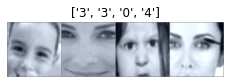

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


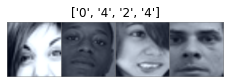

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


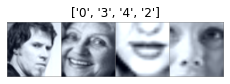

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


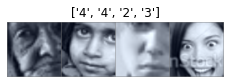

In [11]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

print(classes)    
for i in range(4):
    show_batch_images(trainloader)
    

##  SqueezeNet

In [12]:
model = models.squeezenet1_0(pretrained=True)
model.eval()

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [13]:
print(model.classifier[3])
model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
model.num_classes = num_classes

AdaptiveAvgPool2d(output_size=(1, 1))


In [14]:
print(model)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [15]:
batch_size = 18

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [16]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [17]:
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=9e-4)
#opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=9e-4)
loss_epoch_arr = []

max_epochs = 20

scheduler = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=0.001, steps_per_epoch=len(trainloader), pct_start=0.2, div_factor=10, cycle_momentum=False, epochs=max_epochs)               

In [18]:

b=0.02
min_loss = 1000

n_iters = np.ceil(7177/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
        if epoch==0:
          retain_graph=True
          
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        
        
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        flood = (loss-b).abs()+b                  # flood technique  https://arxiv.org/pdf/2002.08709.pdf
        opt.zero_grad()         
        #loss.backward()
        flood.backward()
        opt.step()
        
        if min_loss > loss.item():
          min_loss = loss.item()
          best_model_Squeezenet = torch.save(model.state_dict(), "bestSqueeze.model")
          print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
          print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
    scheduler.step()    
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch+1, max_epochs, evaluation(testloader, model), evaluation(trainloader, model)))    
    loss_epoch_arr.append(loss.item())

Min loss 2.18
Iteration: 0/399, Loss: 2.18
Min loss 2.16
Min loss 2.11
Min loss 1.74
Min loss 1.71


KeyboardInterrupt: 

In [ ]:
print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader, model), evaluation(trainloader, model)))
    
    
plt.plot(loss_epoch_arr)
plt.show()
#model.load_state_dict(best_model_MobileNet)
#print(evaluation(trainloader, model), evaluation(testloader, model))

In [19]:
torch.save(model.state_dict(), f"bestSqueeze.model")
print("Checkpoint saved")



Checkpoint saved


Prediction:- Happy
Prediction class:-  3
torch.return_types.topk(
values=tensor([[8.3450, 7.4012, 7.3329, 3.4198, 3.2377, 1.5222, 0.8265]],
       grad_fn=<TopkBackward>),
indices=tensor([[3, 0, 2, 4, 6, 1, 5]]))


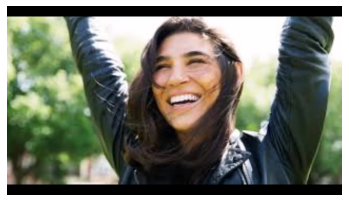

In [19]:

model.to('cpu')
checkpoint = torch.load(Path('bestSqueeze.model'))
#model.load_state_dict(checkpoint)

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(48),
    transforms.CenterCrop(48),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ])
#trans = AlbumentationWrapper('train')

image = Image.open(Path(r'.\image\image.jpg'))
input=image
input = trans(image)
input = input.view(1, 3, 48,48) 
output = model(input)
prediction = int(torch.max(output.data, 1)[1].numpy())

if (prediction == 0):
    print ('Prediction:- Angry')
    
if (prediction == 1):
    print ('Prediction:- Disgust')
    
if (prediction == 2):
    print ('Prediction:- Fear')
    
if (prediction == 3):
    print ('Prediction:- Happy')
    
if (prediction == 4):
    print ('Prediction:- Sad')
    
if (prediction == 5):
    print ('Prediction:- Suprise')
    
if (prediction == 6):
    print ('Prediction:- Neutral')

   
print('Prediction class:- ',prediction)  
    
    
pred=output.topk(7,1,largest=True,sorted=True)
print(pred)  



img=mpimg.imread(r'.\image\image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
torch.cuda.empty_cache()

## ResNet Model

In [ ]:
resnet = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
print(resnet)

In [ ]:
for param in resnet.parameters():
    param.requires_grad = False
    
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

for name, child in resnet.named_children():
    print(name)

In [ ]:
for name, child in resnet.named_children():
    if name in ['layer3', 'layer4']:
        print(name + 'has been unfrozen.')
        for param in child.parameters():
            param.requires_grad = True
    else:
        for param in child.parameters():
            param.requires_grad = False

In [ ]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

In [ ]:
model = resnet.to(device)
loss_fn = nn.CrossEntropyLoss()
#opt = optim.SGD(resnet.parameters(), lr=0.01)
opt = optim.SGD(filter(lambda x: x.requires_grad, resnet.parameters()), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=0.001, steps_per_epoch=len(trainloader), pct_start=0.2, div_factor=10, cycle_momentum=True, epochs=max_epochs)               

In [ ]:

loss_epoch_arr = []
max_epochs = 20

min_loss = 1000

n_iters = np.ceil(7177/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        flood = (loss-b).abs()+b                  # flood technique  https://arxiv.org/pdf/2002.08709.pdf
        opt.zero_grad()         
        #loss.backward()
        flood.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = torch.save(model, 'bestresnet.model')
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    scheduler.step()    
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, resnet), evaluation(trainloader, resnet)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
torch.save(model.state_dict(), f"bestresnet.model")
print("Checkpoint saved")


In [ ]:

model.to('cpu')
#checkpoint = torch.load(Path('bestresnet.model'))
checkpoint=torch.load('bestresnet.model')
#model.load_state_dict(checkpoint)

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(48),
    transforms.CenterCrop(48),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ])
#trans = AlbumentationWrapper('train')

image = Image.open(Path(r'.\image\image.jpg'))
input=image
input = trans(image)
input = input.view(1, 3, 48,48) 
output = model(input)
prediction = int(torch.max(output.data, 1)[1].numpy())

if (prediction == 0):
    print ('Prediction:- Angry')
    
if (prediction == 1):
    print ('Prediction:- Disgust')
    
if (prediction == 2):
    print ('Prediction:- Fear')
    
if (prediction == 3):
    print ('Prediction:- Happy')
    
if (prediction == 4):
    print ('Prediction:- Sad')
    
if (prediction == 5):
    print ('Prediction:- Suprise')
    
if (prediction == 6):
    print ('Prediction:- Neutral')

   
print('Prediction class:- ',prediction)  
    
    
pred=output.topk(7,1,largest=True,sorted=True)
print(pred)  



img=mpimg.imread(r'.\image\image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
torch.cuda.empty_cache()

## ResNext Model

In [ ]:
resnext = models.resnext50_32x4d(pretrained=True)
print(resnext)

In [ ]:
for param in resnext.parameters():
    param.requires_grad = False
    


In [ ]:

in_features = resnext.fc.in_features
resnext.fc = nn.Linear(in_features, num_classes)



In [ ]:
for name, child in resnext.named_children():
    print(name)

In [ ]:
for name, child in resnext.named_children():
    if name in ['layer3', 'layer4']:
        print(name + 'has been unfrozen.')
        for param in child.parameters():
            param.requires_grad = True
    else:
        for param in child.parameters():
            param.requires_grad = False

In [ ]:
for param in resnext.parameters():
    if param.requires_grad:
        print(param.shape)

In [ ]:
print(resnext)

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(256), 
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

transform_test = transforms.Compose([
    transforms.RandomResizedCrop(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

In [ ]:
trainset = torchvision.datasets.ImageFolder(root='./data/Training', transform=transform_train)

testset =  torchvision.datasets.ImageFolder(root='./data/Testing', transform=transform_test)

In [ ]:
batch_size=4

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)




testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
resnext = resnext.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(inception.parameters(), lr=0.01, momentum=0.8)

In [ ]:
def evaluation_resnext(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs, aux_outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
model=resnext

In [ ]:

loss_epoch_arr = []
max_epochs = 20

min_loss = 1000

n_iters = np.ceil(7177/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        flood = (loss-b).abs()+b                  # flood technique  https://arxiv.org/pdf/2002.08709.pdf
        opt.zero_grad()         
        #loss.backward()
        flood.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = torch.save(model, 'bestresNext.model')
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    scheduler.step()    
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, resnet), evaluation(trainloader, resnet)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
model.to('cpu')
#checkpoint = torch.load(Path('bestresnet.model'))
checkpoint=torch.load('bestresNext.model')
#model.load_state_dict(checkpoint)

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(48),
    transforms.CenterCrop(48),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ])
#trans = AlbumentationWrapper('train')

image = Image.open(Path(r'.\image\image.jpg'))
input=image
input = trans(image)
input = input.view(1, 3, 48,48) 
output = model(input)
prediction = int(torch.max(output.data, 1)[1].numpy())

if (prediction == 0):
    print ('Prediction:- Angry')
    
if (prediction == 1):
    print ('Prediction:- Disgust')
    
if (prediction == 2):
    print ('Prediction:- Fear')
    
if (prediction == 3):
    print ('Prediction:- Happy')
    
if (prediction == 4):
    print ('Prediction:- Sad')
    
if (prediction == 5):
    print ('Prediction:- Suprise')
    
if (prediction == 6):
    print ('Prediction:- Neutral')

   
print('Prediction class:- ',prediction)  
    
    
pred=output.topk(7,1,largest=True,sorted=True)
print(pred)  



img=mpimg.imread(r'.\image\image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
torch.cuda.empty_cache()

## Custom Network

In [ ]:
import torch
from torch.utils import data
import pandas as pd
import albumentations
from albumentations import pytorch as AT
from tqdm import tqdm
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
import torch.nn.functional as F
import torchvision.models as models
from torch import nn
from torchsummary import summary
from collections import OrderedDict
import torch.optim as optim  
import torchvision.transforms as transforms
from torchvision import models

In [ ]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device=torch.device('cuda')
torch.cuda.is_available()

In [ ]:
df=pd.read_csv('./data/fer2013.csv')
file=df
df.head()

In [ ]:
df['Usage'].unique()

In [ ]:
print(len(df[df['Usage']=='Training']))
print(len(df[df['Usage']=='PublicTest']))
print(len(df[df['Usage']=='PrivateTest']))

In [ ]:
df['pixels']

In [ ]:
df['pixelss']=[[int(y) for y in x.split()] for x in df['pixels']]

In [ ]:
df['pixelss']

In [ ]:
df.head()

In [ ]:
df_train=df[df['Usage']=='Training']
df_valid=df[df['Usage']=='PrivateTest']
df_test=df[df['Usage']=='PublicTest']

In [ ]:
im=np.array(df_train['pixelss'][800])
img=im.reshape(48,48)
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
part={}
part['train']= list(range(0,len(df_train)))
part['valid']= list(range(0,len(df_valid)))
part['test']= list(range(0,len(df_test)))
train_labels=df_train['emotion'].tolist()
valid_labels=df_valid['emotion'].tolist()
test_labels=df_test['emotion'].tolist()

In [ ]:
class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, dff, transforms):
        'Initialization'
        self.transforms = transforms
        self.dff=dff

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.dff)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        #ID = self.list_IDs[index]

        # Load data and get label
        X = self.dff.iloc[index]['pixelss']
        X = np.array(X).reshape(48,48,1)
        y = self.dff.iloc[index]['emotion']

        if self.transforms:
          X = self.transforms(X)
        
        X = torch.cat((X,X,X),0)

        return X, y

In [ ]:
params = {'batch_size': 32,'shuffle': True,'num_workers': 0}

In [ ]:
class AlbumentationWrapper(object):
  def __init__(self,split):
    self.split=split
    self.aug=albumentations.Compose([                                         
    albumentations.Normalize((0.5), (0.5)),
    AT.ToTensor()
    ])

    if self.split=='train':
      self.aug=albumentations.Compose([
                                             
        albumentations.Resize(48,48),
        albumentations.HorizontalFlip(),
        albumentations.Cutout(2,2,2,0.5),
        albumentations.GaussNoise(),
        #albumentations.ElasticTransform(),    
        albumentations.Normalize((0.5), (0.5)),
        AT.ToTensor()    
        ])
            
  def __call__(self,img):
    #img = np.array(img)
    img = self.aug(image=img)['image']
    return img

  
train_transforms , validation_transforms=AlbumentationWrapper('train'), AlbumentationWrapper('test')


training_set = Dataset(df_train, train_transforms)
training_generator = data.DataLoader(training_set, **params)

validation_set = Dataset(df_valid, validation_transforms)
validation_generator = data.DataLoader(validation_set, **params)

test_set = Dataset(df_test, validation_transforms)
test_generator = data.DataLoader(test_set, **params)

In [ ]:
classes={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Suprise",6:"Neutral"}
num_classes=7
print(classes)

In [ ]:
def plot(train_losses,train_acc,test_losses,test_acc, label):
  fig, axs = plt.subplots(1,2,figsize=(20,8))
  axs[0].plot(test_losses, label=label)
  axs[0].set_title("Test Loss")
  axs[1].plot(test_acc, label=label)
  axs[1].set_title("Test Accuracy")
  
 


In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
def train(model, train_loader, optimizer,scheduler):
  model.train()
  pbar = tqdm(train_loader)
  running_loss = 0.0
  correct = 0
  processed = 0
  criterion = nn.CrossEntropyLoss()

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    y_pred = model(data)
    loss = criterion(y_pred, target)
    running_loss += loss.item()
    train_loss.append(loss)
    loss.backward()
    optimizer.step()
    scheduler.step()

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    #pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f} running_loss={running_loss} threshold={best_loss*(0.996)}')
    train_acc.append(100*correct/processed)
    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} le={get_lr(optimizer)} Accuracy={100*correct/processed:0.2f}')

In [ ]:



def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            new_target=target.view_as(pred)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    valid_loss.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    valid_acc.append(100.0 * correct / len(test_loader.dataset))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        dropout_value = dropout=0.1
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) 

        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            # nn.Dropout(dropout_value)            
        ) 

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 24 RF=7
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            # nn.Dropout(dropout_value)            
        ) 

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        ) 

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), padding=1 , bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            # nn.Dropout(dropout_value)            
        ) 

        # TRANSITION BLOCK 2
        self.pool2 = nn.MaxPool2d(2, 2) # output_size = 12 RF=20

        # CONVOLUTION BLOCK 2
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            # nn.Dropout(dropout_value)            
        ) 

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            # nn.Dropout(dropout_value)            
        )

        # TRANSITION BLOCK 3
        self.pool3 = nn.MaxPool2d(2, 2) # output_size =6 RF=32

        self.convblock8 = nn.Sequential(
             nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=(3, 3), padding=1, bias=False),
             nn.ReLU(),
             nn.BatchNorm2d(512),
             # nn.Dropout(dropout_value)            
         ) 

        self.convblock9 = nn.Sequential(
             nn.Conv2d(in_channels=512, out_channels=256, kernel_size=(3, 3), padding=0, bias=False),
             nn.ReLU(),
             nn.BatchNorm2d(256),
             # nn.Dropout(dropout_value)            
         )
        # self.pool2 = nn.MaxPool2d(2, 2) # output_size = 2
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        ) 
        self.convblock10 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=7, kernel_size=(1, 1), padding=0, bias=False)
        ) 

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)        
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.pool2(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.pool3(x)   
        x = self.convblock8(x) 
        x = self.convblock9(x)    
        x = self.gap(x)
        x = self.convblock10(x)
        x = x.view(-1, 7)
        return F.log_softmax(x, dim = -1)                                                                                         

In [ ]:
model=Net()      # 1.0 is dropout                                                                                                            
model.to(device)    

epochs=20
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=9e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(training_generator), pct_start=0.2, div_factor=10, cycle_momentum=False, epochs=epochs)

input_size=(3,48,48)
train_acc = []
train_loss = []
valid_acc = []
valid_loss = []
for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    train(model, training_generator, optimizer,scheduler)
    test(model, validation_generator)
    #scheduler.step()
plot(train_loss,train_acc, valid_loss, valid_acc, 'Loss & Accuracy')


In [ ]:
test(model, validation_generator)

In [ ]:
torch.save(model.state_dict(), f"best_custom{epoch}.model")
print("Checkpoint saved")


In [ ]:

model =Net()
checkpoint = torch.load(Path('best_custom0.model'))
model.load_state_dict(checkpoint)

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(48),
    transforms.CenterCrop(48),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ])
#trans = AlbumentationWrapper('train')

image = Image.open(Path(r'.\image\image.jpg'))
input=image
input = trans(image)
input = input.view(1, 3, 48,48) 
output = model(input)
prediction = int(torch.max(output.data, 1)[1].numpy())

if (prediction == 0):
    print ('Prediction:- Angry')
    
if (prediction == 1):
    print ('Prediction:- Disgust')
    
if (prediction == 2):
    print ('Prediction:- Fear')
    
if (prediction == 3):
    print ('Prediction:- Happy')
    
if (prediction == 4):
    print ('Prediction:- Sad')
    
if (prediction == 5):
    print ('Prediction:- Suprise')
    
if (prediction == 6):
    print ('Prediction:- Neutral')

   
print('Prediction class:- ',prediction)  
    
    
pred=output.topk(7,1,largest=True,sorted=True)
print(pred)  



img=mpimg.imread(r'.\image\image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
torch.cuda.empty_cache()